# 1. Sistemas Lineares - Métodos Diretos



<ol type = "a">
  <li>Método transforma um sistema linear $Ax = b$ de ordem $n$, onde $A$ possui todos os menores principais não-singulares, em um sistema triangular superior equivalente, através de aplicação sucessiva de operações elementares afim de obter mesma resolução de forma mais fácil. Primeiro obtém-se uma matriz aumentada na forma $[A|b]$, transforma-a em uma matriz triangular superior e resolve o novo sistema por substituição regressiva. Teoricamente a fatoração LU é equivalente ao método de Gauss, na fatoração LU guardamos os multiplicadores usados para tranformar $A$ em uma matriz triangular superior.  </li>
</ol>

<h5>Determine as matrizes M1, M2, M3

In [ ]:
#Biblioteca
import numpy as np

#Eliminação de Gauss
def ElimGauss(A):
  n = np.shape(A)[0]
  for k in range(0,n-1):
    for i in range(k+1,n):
      lam = A[i,k]/A[k,k]
      A[i,k:n] = A[i,k:n] - lam*A[k,k:n]
    print("M" + str(k + 1))
    print(A, "\n")      

A = np.array([[-1, 2, -2, 1], [-2, 2, -3, 0],[-2, 0, -1, -3], [-2, 0, 0, -2]])
ElimGauss(A)

M1
[[-1  2 -2  1]
 [ 0 -2  1 -2]
 [ 0 -4  3 -5]
 [ 0 -4  4 -4]] 

M2
[[-1  2 -2  1]
 [ 0 -2  1 -2]
 [ 0  0  1 -1]
 [ 0  0  2  0]] 

M3
[[-1  2 -2  1]
 [ 0 -2  1 -2]
 [ 0  0  1 -1]
 [ 0  0  0  2]] 



<h5>Cálculo da matriz inversa</h5>

In [ ]:
#Biblioteca
import numpy as np

#Decomposição LU
def decompLU(A):
     n = np.shape(A)[0]
     L = np.eye(n) 
     U = np.zeros((n,n))
     for k  in np.arange(n):
        for j in np.arange(k,n):
           U[k,j]=A[k,j]
           for s in np.arange(k):
               U[k,j] = U[k,j] - L[k,s]*U[s,j]
        for i in np.arange(k+1,n):
           L[i,k]=A[i,k]
           for s in np.arange(k):
               L[i,k] = L[i,k] - L[i,s]*U[s,k]
           L[i,k] = L[i,k]/U[k,k]
     return L, U   

#Resolução do sistema linear a partir da decomposição
def solve(L,U,b):
   n = np.shape(A)[0]  
   for k in range(1,n):
      b[k] = b[k] - L[k,0:k].dot(b[0:k])
   for k in range(n-1,-1,-1):
      b[k] = (b[k] - U[k,k+1:n].dot(b[k+1:n]))/U[k,k]
   return b

#Função que calcula a inversa a partir da decomposição LU
def inversa(A):
    n = np.shape(A)[0]
    L,U = decompLU(A)
    B = np.zeros((n,n))
    for i in np.arange(n):
        #gera a coluna correspondente a matriz identidade
        y = np.zeros((n, 1))
        y[i] = 1
        #calcula a coluna correspondente ao indice
        B[:,i] = solve(L, U, y)[:,0]
    return B


A = np.array([[-1, 2, -2, 1], [-2, 2, -3, 0],[-2, 0, -1, -3], [-2, 0, 0, -2]])
B = inversa(A)

print("A \n", A, "\n")
print("B = inversa(A) \n", B)

A 
 [[-1  2 -2  1]
 [-2  2 -3  0]
 [-2  0 -1 -3]
 [-2  0  0 -2]] 

B = inversa(A) 
 [[ 1.   -1.    1.   -1.  ]
 [ 2.5  -2.    1.   -0.25]
 [ 1.   -1.    0.    0.5 ]
 [-1.    1.   -1.    0.5 ]]


# 2. Sistemas Lineares - Métodos Iterativos 

In [ ]:
#Bibliotecas
import numpy as np
import math as m

# Gauss-Jacobi
def gauss_jacobi(A,b,x0,tol,flag):
    n = np.shape(A)[0];
    D = np.diag(np.diag(A));
    aux_C = np.linalg.solve(D,A);
    C = np.eye(n) - aux_C;
    g = np.linalg.solve(D,b);
    kmax = 10000; k = 0;

    print("Cj \n ", C)
    print("\n gj \n", g, "\n")

    error = np.zeros(kmax);
    if flag:
        statment = (np.linalg.norm(b-A.dot(x0))>tol and k<kmax);
    else:
        statment = (k<kmax);

    while statment:
        error[k] = np.linalg.norm(b-A.dot(x0));
        k = k+1;
        x0 = C.dot(x0)+g;
        if flag:
            statment = (np.linalg.norm(b-A.dot(x0))>tol and k<kmax);
        else:
            statment = (k<kmax);
    
    if (k == kmax and flag):
        print('\nErro: o método não converge.\n')
    
    x = x0;
    return x,k,error

# Gauss-Seidel
def gauss_seidel(A,b,x0,tol,flag):
    L = np.tril(A); R = np.triu(A,1);
    C = -np.linalg.solve(L,R);
    g = np.linalg.solve(L,b);
    kmax = 10000; k = 0;

    print("Cgs \n ", C)
    print("\n ggs \n", g, "\n")

    error = np.zeros(kmax); 

    if flag: 
        statment = (np.linalg.norm(b-A.dot(x0))>tol and k<kmax);
    else:
        statment = (k<kmax);
        
    while statment:
        error[k] = np.linalg.norm(b-A.dot(x0));
        k = k+1;
        x0 = C.dot(x0)+g;
        if flag:
            statment = (np.linalg.norm(b-A.dot(x0))>tol and k<kmax);
        else:
            statment = (k<kmax);

    if (k == kmax and flag):
        print('\nErro: o método não converge.\n')
    
    x = x0;
    return x,k,error

# Exemplo
A = np.array([[ 4, -2, 1, 0, 0, 0], [-2, 7, -2, 1, 0, 0], [1, -2, 7, -2, 1, 0], [0, 1, -2, 7, -2, 1], [0, 0, 1, -2, 7, -2],[0, 0, 0, 1, -2, 4]], dtype='double')
print("A \n", A)
b = np.array([-1, -2, 1, 1, -2, -1], dtype='double')
print("\n b \n", b, "\n")

# Função Python
print('\nSolução Python:\n')
x = np.linalg.solve(A,b);
print(x, "\n");




# Métodos Iterativos
n = np.shape(A)[0];
x0 = np.zeros(n); tol = 0.00000001; x0[0] = 1;

print('\nSolução Gauss-Jacobi:\n')
(x_jacobi,k_jacobi,erro_jacobi) = gauss_jacobi(A,b,x0,tol,1);

print(x_jacobi);
print('\n Converge em %d iterações \n' %(k_jacobi))




print('\nSolução Gauss-Siedel:\n')
(x_siedel,k_siedel,erro_siedel) = gauss_seidel(A,b,x0,tol,1);
print(x_siedel);
print('\n Converge em %d iterações \n' %(k_siedel))

A 
 [[ 4. -2.  1.  0.  0.  0.]
 [-2.  7. -2.  1.  0.  0.]
 [ 1. -2.  7. -2.  1.  0.]
 [ 0.  1. -2.  7. -2.  1.]
 [ 0.  0.  1. -2.  7. -2.]
 [ 0.  0.  0.  1. -2.  4.]]

 b 
 [-1. -2.  1.  1. -2. -1.] 


Solução Python:

[-0.50442478 -0.39823009  0.22123894  0.22123894 -0.39823009 -0.50442478] 


Solução Gauss-Jacobi:

Cj 
  [[ 0.          0.5        -0.25        0.          0.          0.        ]
 [ 0.28571429  0.          0.28571429 -0.14285714  0.          0.        ]
 [-0.14285714  0.28571429  0.          0.28571429 -0.14285714  0.        ]
 [ 0.         -0.14285714  0.28571429  0.          0.28571429 -0.14285714]
 [ 0.          0.         -0.14285714  0.28571429  0.          0.28571429]
 [ 0.          0.          0.         -0.25        0.5         0.        ]]

 gj 
 [-0.25       -0.28571429  0.14285714  0.14285714 -0.28571429 -0.25      ] 

[-0.50442478 -0.39823009  0.22123894  0.22123894 -0.39823009 -0.50442478]

 Converge em 80 iterações 


Solução Gauss-Siedel:

Cgs 
  [[-0.  

Gauss-Siedel converge consideravelmente mais rápido que Gauss-Jacobi para esse caso

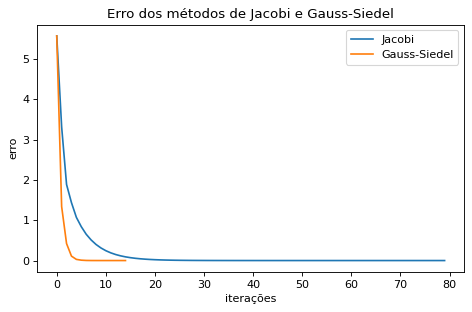

In [ ]:
from matplotlib import pyplot as plt


plt.figure(dpi=80)
plt.plot(erro_jacobi[0:k_jacobi], label="Jacobi")
plt.plot(erro_siedel[0:k_siedel], label="Gauss-Siedel")
plt.xlabel("iterações")
plt.ylabel("erro")
plt.title("Erro dos métodos de Jacobi e Gauss-Siedel")
plt.legend()
plt.tight_layout()
plt.show()

# 3. Problemas de Autovalor 


  * Método de Francis: Consiste em utilizar a decomposição QR e fazer uso das propriedades de ortoganalidade da matriz $Q$, até que o traço da matriz $A_{k}$ esteja próximo dos autovalores da matriz $A$. Para os autovetores inicia-se uma matriz $V$ igual a identidade que faz produto com a matriz $Q$ de cada iteração, as colunas de $V$ representam os autovetores.
  * Método das Potências: O método supõe que há um autovalor dominante $\lambda_{1}$ de forma que $A^{k}\vec{y} = \lambda_{1}^{k}[c_1\vec{y_1} + c_2(\frac{\lambda_{2}}{\lambda_{1}})^{k}\vec{y_2} + ... + c_n(\frac{\lambda_{n}}{\lambda_{1}})^{k}\vec{y_n}]$ podesse reparar que para um $k$ muito grande $(\frac{\lambda_{n}}{\lambda_{1}})^{k} \approx 0$ e então $A^{k}\vec{y} = \lambda_{1}^{k}c_1\vec{y_1}$
  * Método das Potências inversa: Segue os mesmos conceitos do método das potências, mas ao invés de usar $\lambda$ troca por $\frac{1}{\lambda}$, assim o método funciona para o menor $\lambda$

In [ ]:
import numpy as np

# Decomposição QR
# utilizado no método de Francis
def QR(A):
  # Dimensões da Matriz A
  (m, n) = A.shape
  # inicializando as matrizes Q e R
  Q = np.zeros((m, n))
  R = np.zeros((n, n))

  # populando Q e R
  for j in np.arange(n):
    V = A[:,j]
    for i in np.arange(j):
      R[i,j] = Q[:,i] @ A[:,j]
      V = V - R[i,j] * Q[:,i]
    
    R[j,j] = np.sqrt(V.T @ V)
    Q[:,j] = V/R[j,j]
  
  return Q, R


# Método de Francis
def metFrancis(A, tol = 1e-6):
  n = A.shape[0]
  # iniciando a matriz de autovetores
  V = np.eye(n)
  erro = 2*tol

  while erro > tol:
    [Q, R] = QR(A)
    A = R @ Q
    V = V @ Q

    erro = np.max(np.max(np.abs(np.tril(A,-1))))
  
  # Extraindo a diagonal de A_k
  D = np.diag(A)
  return D, V

#Método da potência
def metPotencia(A, tol = 1e-6):
  k, kmax, erro = 0, 10000, 2*tol
  n = A.shape[0]
  y0 = np.zeros(n)
  y0[0] = 1

  while (erro > tol and k < kmax):
    x = A @ y0
    y = x/np.sqrt(x.T @ x)
    erro = np.abs(np.abs(y0 @ y)-1)
    y0 = y
    k = k + 1

  lambda_ = y @ A @ y;
  return lambda_, y, k


#Método da potência inversa
def metPotenciaInv(A, tol = 1e-6):
  k, kmax, erro = 0, 10000, 2*tol
  n = A.shape[0]
  y0 = np.zeros(n)
  y0[0] = 1

  while (erro > tol and k < kmax):
    x = np.linalg.solve(A,y0)
    y = x/np.sqrt(x.T @ x)
    erro = np.abs(np.abs(y0 @ y)-1)
    y0 = y
    k = k + 1

  lambda_ = y @ A @ y;
  return lambda_, y, k

In [ ]:
MatrizA = np.array([  [11, 2, 3, 1, 4],
                      [ 2, 9, 3, 5, 2],
                      [ 3, 3,15, 4, 3],
                      [ 1, 5, 4,12, 4],
                      [ 4, 2, 3, 4,17]  ])
francis = metFrancis(MatrizA)
print("Método de Francis: \n", "D \n", francis[0], "\n \n V \n", francis[1], "\n \n")
pot = metPotencia(MatrizA)
print("Método da Potência \n", "lambda:", pot[0], "\n \n v \n", pot[1], "\n \n")
potInv = metPotenciaInv(MatrizA)
print("Método da Potência Inversa \n", "lambda:", potInv[0], "\n \n v \n", potInv[1], "\n \n")
res = np.linalg.eig(MatrizA)
print("Solução Python: \n", "D \n", res[0], "\n \n V \n", res[1], "\n \n")

Método de Francis: 
 D 
 [26.02517458 13.50053662 10.93677451  8.66356791  4.87394638] 
 
 V 
 [[ 0.32743522 -0.18423653  0.50579155 -0.72910004 -0.26726603]
 [ 0.32598403  0.26654145 -0.31882378 -0.41391447  0.74142854]
 [ 0.49833057  0.54143934  0.5207781   0.42986388  0.05017271]
 [ 0.4474816   0.27839546 -0.60290532 -0.06955609 -0.59491453]
 [ 0.58133247 -0.72412152 -0.08844012  0.32782152  0.14970633]] 
 

Método da Potência 
 lambda: 26.02516559992627 
 
 v 
 [0.32774274 0.32570306 0.49802268 0.44710304 0.58187155] 
 

Método da Potência Inversa 
 lambda: 4.873955411950512 
 
 v 
 [ 0.26841677 -0.74080601 -0.05080944  0.59498958 -0.15021552] 
 

Solução Python: 
 D 
 [26.02517458  4.87394638  8.66356791 10.93677451 13.50053662] 
 
 V 
 [[ 0.32743522  0.26726603 -0.72910002 -0.50579164  0.18423634]
 [ 0.32598403 -0.74142854 -0.41391448  0.31882387 -0.26654133]
 [ 0.49833057 -0.05017271  0.4298639  -0.52077788 -0.54143954]
 [ 0.4474816   0.59491453 -0.06955611  0.60290543 -0.278395

Os métodos apresentam resultados equivalentes exceto por alguns sinais trocados devido as operações matriciais. O método de Francis apresenta um valor aproximado dado o seu critério de parada.

# 4. Problemas de Autovalor - PageRank do Google 

Para o ranqueamento das páginas deve-se considerar a quantidade de referências que cada página recebe, tratamos essas conexões entre as páginas como um grafo direcionado. Sendo o vetor $y$ a relevância de cada página e $A$ a matriz de adjacência do grafo, temos $y = Ay$ sendo $y$ o autovetor da matriz $A$ correspondente ao autovalor 1. Para que consigamos calcular o autovetor $y$ é preciso aplicar modificações na matriz $A$, a primeira delas é garantir que o grafo seja percorrido sem que caia em nós pendentes(páginas sem link) atribuindo uma probabilidade igual de prosseguir para qualquer outra página a segunda modificação é adicionar um fator correspondente a um utilizador imaginário que siga as ligações entre as páginas aleatoriamente transformando o em um grafo irredutível afim de evitar ciclos. Por fim é utilizado o método de potências para encontrar o vetor $y$ da matriz irredutível.  

In [ ]:
import numpy as np

# Função que recebe uma lista de arestas e retorna a matriz de adjacência
def matriz_adjacencia(arestas, num_vertices):
  A = np.zeros((num_vertices, num_vertices) , float)
  
  for vertice_i, vertice_j in arestas:
    A[vertice_i-1, vertice_j-1] = 1
  
  return A

# Método da potencia e cadeia de markov
def potencias_markov(A, kmax = 1000, tol = 1e-6):
  k = 0 # iterador
  erro = 2*tol # erro inicial
  n = A.shape[0]
  y0 = np.ones((n,1))/n # vetor de distribuição de probabilidades
  
  while ((erro > tol) and (k < kmax)):
    # multiplica matriz A pela distribuição de probabilidades y0
    y = A @ y0
    # calcula o erro
    erro = np.abs(np.abs(y0.T @ y)-1)
    y0 = y
    k = k+1
  
  # lambda associado ao autovetor y
  lambda_ = y.T @ A @ y

  # retorna o autovetor associado ao lambda
  # como o pagerank utiliza somente o autovetor
  # as outras saidas foram omitidas
  return y

# algoritmo do pagerank recebe a matriz de adjacência e a constante alpha
def pagerank(matriz_adj, alpha = 0.85):
  n = matriz_adj.shape[0]
  # soma o numero de conexões de cada pagina
  soma = np.array(sum(matriz_adj))
  # verifica qual pagina não tem conexão
  j = np.where(soma == 0)
  # Resolvendo os problemas com sumidouros
  matriz_adj[:,j] = 1

  # grafo modificado
  S = np.divide(matriz_adj, sum(matriz_adj).T)
  # grafo irredutível
  G = alpha*S + (1-alpha)*np.ones((n,n))/n
  # aplicação do método das potências
  y = potencias_markov(G)

  # retorna os indices em ordem decrecente
  return np.argsort(y[:,0])[-1::-1] + 1

In [ ]:
# lista de arestas das conexões dos sites
lista_arestas = [ [2, 1], [3, 1], [2, 3], [4, 3], [5, 4], [6, 4], [6, 5], [4, 6], [5, 6] ]
# matriz de adjacência da lista de arestas
m_adj = matriz_adjacencia(lista_arestas, 6)
# ranking dos sites
ranking = pagerank(m_adj)
# imprime o ranking
print(ranking)

[6 5 4 2 3 1]
